In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn.utils import shuffle
import random


In [188]:
data = pd.read_table(r'C:\Users\97150\Desktop\study\TA\iris.data', sep=",", header=None, names=['sepal_Length', 'sepal_Width', 'petal_Length', 'petal_Width', 'Iris_feature'])

In [189]:
data

,sepal_Length,sepal_Width,petal_Length,petal_Width,Iris_feature
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [191]:

data['Iris_feature'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [194]:
data['Iris_feature'] = pd.Categorical(data['Iris_feature'])
data['Iris_feature'] = data['Iris_feature'].cat.codes

In [216]:
data


,sepal_Length,sepal_Width,petal_Length,petal_Width,Iris_feature
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [196]:
cv = model_selection.KFold(n_splits=5)

In [199]:
X = data[data.columns[:-1]].values
y = data['Iris_feature'].values

In [200]:

X, y = shuffle(X, y, random_state = 999)

In [201]:
for i, j in cv.split(data):
    train_X, test_X = X[i], X[j]
    train_Y, test_Y = y[i], y[j]
    print(test_Y)

[1 1 1 0 0 0 0 1 2 0 0 2 0 2 1 2 2 2 2 0 0 0 0 2 1 0 2 2 2 2]
[2 2 1 0 2 0 1 2 1 1 1 2 0 1 2 1 0 1 0 0 2 1 0 2 0 0 0 1 2 2]
[1 0 0 1 1 2 2 0 1 1 0 1 2 1 1 1 1 1 0 0 2 0 2 2 0 1 1 1 1 0]
[0 0 0 1 2 0 0 1 2 1 2 2 0 2 0 1 1 2 0 2 0 1 1 2 0 1 1 1 2 0]
[2 1 0 2 0 2 2 1 1 2 0 2 0 0 2 2 2 1 1 1 2 0 1 1 2 0 2 0 2 1]


In [209]:
no_Neighbors = 25 
kNN_accuracy = [[] for i in range(no_Neighbors)]
decisiontree_accuracy = []

for i, j in cv.split(data):
    train_X, test_X = X[i], X[j]
    train_Y, test_Y = y[i], y[j]
  #decision tree
    classf = DecisionTreeClassifier()
    classf.fit(train_X, train_Y)
    pred_Y = classf.predict(test_X)
    decisiontree_accuracy.append(metrics.accuracy_score(pred_Y, test_Y))
    
    
    # k-NN Classification
    accuracyK = []
    for k in range(0,no_Neighbors):
        knn = neighbors.KNeighborsClassifier(n_neighbors = k+1)
        knn.fit(train_X, train_Y)
        pred_Y = knn.predict(test_X)
        kNN_accuracy[k].append(metrics.accuracy_score(pred_Y, test_Y))
    kNN_accuracy.append(accuracyK)

In [214]:
print("The decision tree accuracy:", np.mean(decisiontree_accuracy))


The decision tree accuracy: 0.9533333333333334


In [211]:
kNN_accuracy_mean = []
for i in range(0,25):
    kNN_accuracy_mean.append(np.mean(kNN_accuracy[i]))

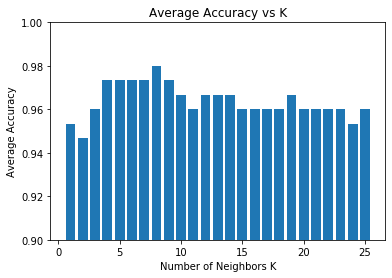

In [212]:
plt.bar([y+1 for y in range(no_Neighbors)], kNN_accuracy_mean)
plt.ylim([0.9,1])
plt.xlabel("Number of Neighbors K")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy vs K")
plt.show()

In [213]:
kNN_accuracy_mean[7]

0.9800000000000001

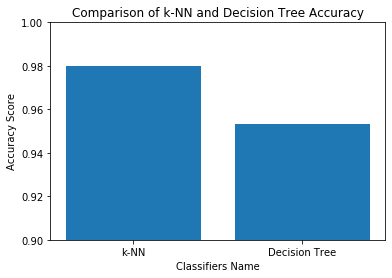

In [217]:
objects = ('k-NN', 'Decision Tree')
y_pos = np.arange(len(objects))
plt.bar(np.arange(2), [kNN_accuracy_mean[7], np.mean(decisiontree_accuracy)])
plt.ylim([0.9,1])
plt.title("Comparison of k-NN and Decision Tree Accuracy")
plt.ylabel("Accuracy Score")
plt.xlabel("Classifiers Name")
plt.xticks(y_pos, objects)
plt.show()